<a href="https://colab.research.google.com/github/AdarshP383/Deep-Learning/blob/main/Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Classification Project

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Load MNIST dataset


In [3]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

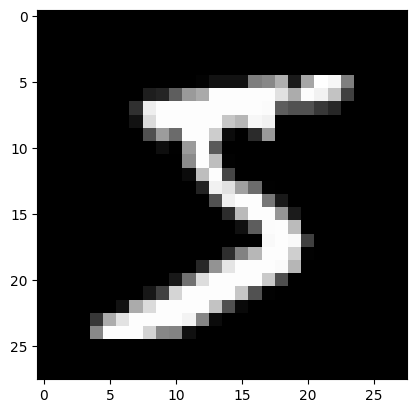

In [7]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap ='gray')

In [8]:
xtest.shape

(10000, 28, 28)

In [9]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

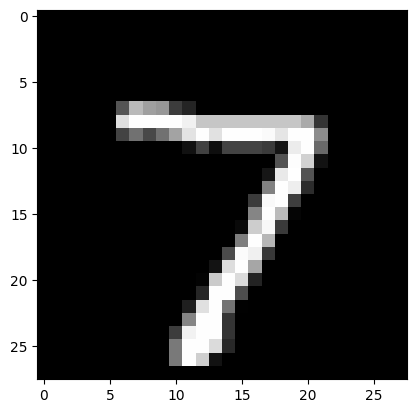

In [10]:
plt.imshow(xtest[0], cmap ='gray')

### Displaying first 9 images from train data


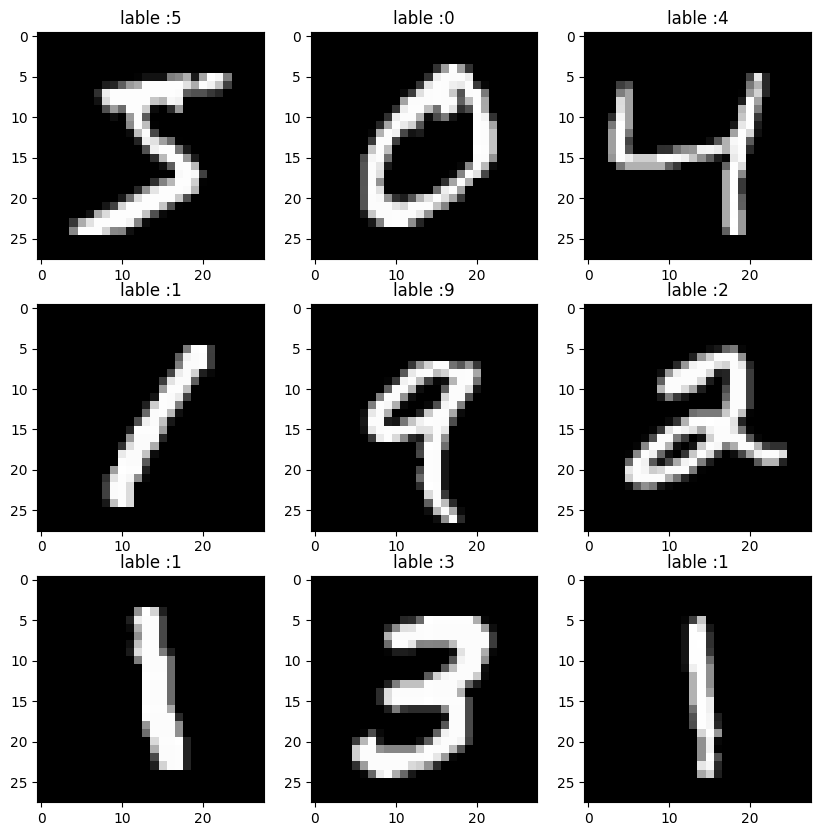

In [11]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(xtrain[i], cmap ='gray')
    plt.title(f"lable :{ytrain[i]}")

In [12]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
len(np.unique(ytrain))

10

### This is a multiclass classification Problem


#### Preprocess image data
Pixel value - 0 - 255


In [14]:
xtrain_scl = xtrain.astype('float32')/255
xtest_scl = xtest.astype('float32')/255

In [15]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Onehot encode the y features


In [16]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [17]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [18]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

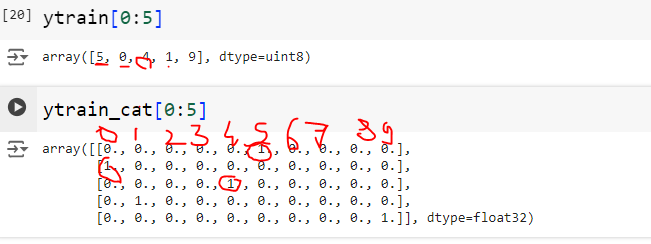

In [19]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
xtrain.shape

(60000, 28, 28)

### Build the neural network


In [22]:
#Simple Covnet architecture



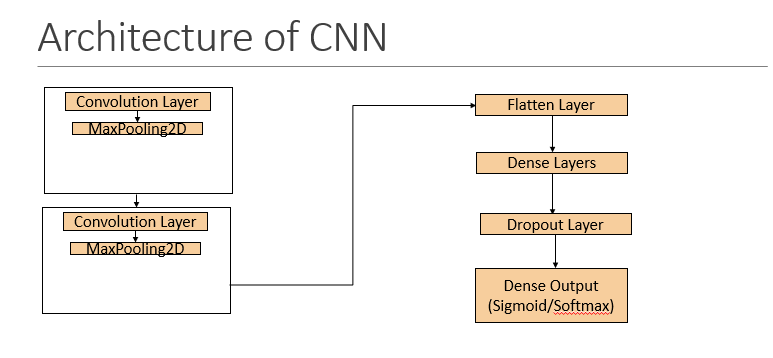

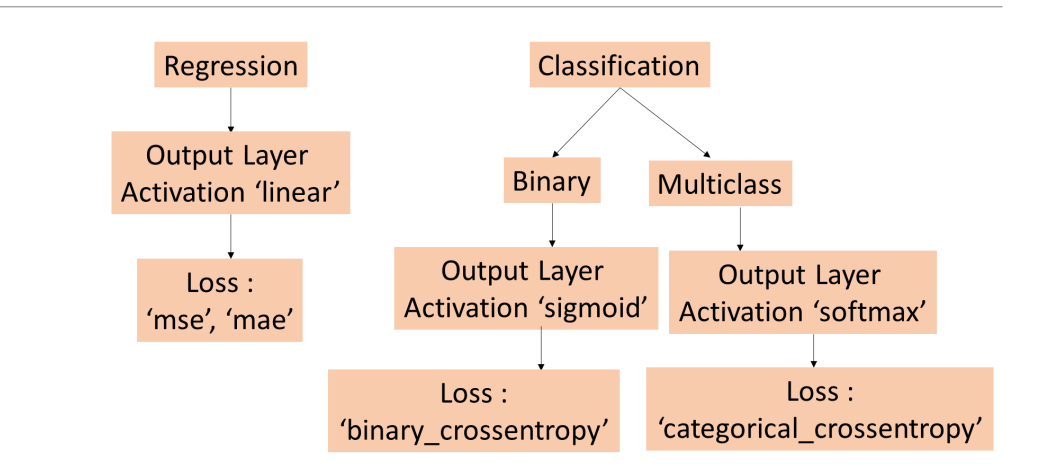

In [23]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [24]:
model = Sequential()

# Added input layer
model.add (Input(shape=(28,28,1)))

# Added Convoluation Layer 1

model.add (Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

# Add max poolling 1
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Convoluation layer 2
model.add (Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Add max poolling 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Flatten layer
model.add(Flatten())

# Add Dropout layer
model.add(Dropout(0.5))

# Output layer

model.add (Dense (ytrain_cat.shape[1], activation='softmax'))



In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [27]:
hist  = model.fit(xtrain_scl, ytrain_cat, epochs = 15, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 15s 5ms/step - loss: 0.2182 - accuracy: 0.9339 - val_loss: 0.0603 - val_accuracy: 0.9832
Epoch 2/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0853 - accuracy: 0.9727 - val_loss: 0.0420 - val_accuracy: 0.9880
Epoch 3/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0652 - accuracy: 0.9799 - val_loss: 0.0386 - val_accuracy: 0.9900
Epoch 4/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0555 - accuracy: 0.9824 - val_loss: 0.0356 - val_accuracy: 0.9893
Epoch 5/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0496 - accuracy: 0.9839 - val_loss: 0.0331 - val_accuracy: 0.9913
Epoch 6/15
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0440 - accuracy: 0.9857 - val_loss: 0.0324 - val_accuracy: 0.9918
Epoch 7/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0395 - accuracy: 0.9870 - val_loss: 0.0335 - val_accuracy

### Plot the learning curve


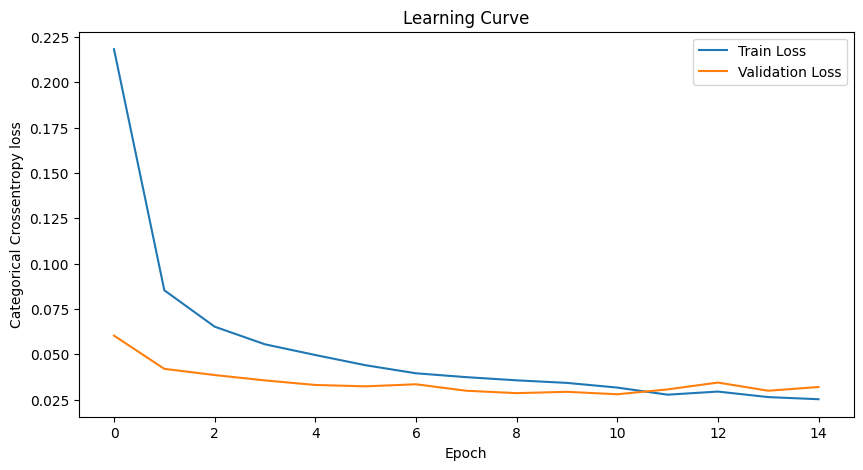

In [28]:
plt.figure (figsize =(10,5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title("Learning Curve")
plt.ylabel('Categorical Crossentropy loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Evaluate the model in train and test


In [29]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0107 - accuracy: 0.9970


[0.010691960342228413, 0.9970333576202393]

In [30]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0231 - accuracy: 0.9930


[0.02308373525738716, 0.9929999709129333]

### Predict results for train and test


In [31]:
yprob_train = model.predict (xtrain_scl)
yprob_test = model.predict(xtest_scl)


313/313 [==============================] - 1s 2ms/step


In [32]:
yprob_train[0:5]

array([[5.5041358e-12, 8.8826099e-12, 3.1542463e-10, 5.8937013e-02,
        5.7450041e-13, 9.4104546e-01, 1.3782915e-12, 3.3473333e-07,
        8.0959135e-06, 9.0992335e-06],
       [1.0000000e+00, 1.5267544e-17, 3.9382140e-08, 9.5665637e-15,
        5.0417275e-14, 1.0244967e-13, 1.9155422e-09, 1.3542044e-13,
        1.0238673e-10, 2.0459943e-10],
       [7.1261565e-16, 2.0807870e-07, 4.3898066e-11, 1.3351630e-12,
        9.9999690e-01, 2.1840278e-11, 1.8060593e-11, 2.4439425e-06,
        9.3835686e-09, 3.3704873e-07],
       [5.0378807e-10, 9.9999571e-01, 1.1042819e-07, 1.7427884e-11,
        2.7060073e-06, 5.3883981e-10, 5.8961431e-09, 1.2571004e-06,
        2.1324460e-07, 1.9425697e-09],
       [4.0423061e-11, 1.0497211e-10, 3.7548245e-10, 6.1270171e-09,
        2.2541941e-04, 7.8165030e-11, 1.5758125e-13, 1.8640631e-06,
        8.0745624e-05, 9.9969196e-01]], dtype=float32)

In [33]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [34]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [35]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [36]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Plot the confusion Matrix


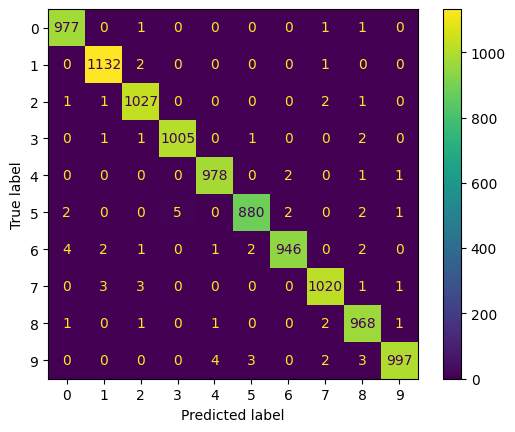

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)


In [38]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Save above model for future use


In [39]:
model.save('Digit_model.keras')

### Load above model


In [40]:
from keras.models import load_model
nn = load_model ("/content/Digit_model.keras")
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [42]:
# Loand the image
import cv2
img = cv2.imread("/content/example_img.jpg", cv2.IMREAD_GRAYSCALE)
img

array([[  1,   1,   0,   1,   0,   0,   2,   0,   2,   0,   0,   2,   0,
          0,   2,   1,   1,   0,   0,   0,   3,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   2,   0,   1,   0,   3,   3,   0,   0,
          0,   0,   0,   0,   4,   0,   2,   2,   0,   1,   0,   0,   0,
          0,   0],
       [  1,   2,   1,   1,   0,   0,   4,   0,   0,   0,   0,   0,   2,
          0,   0,   5,   2,   0,   0,   0,   0,   5,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   2,   2,   0,   2,   0,   1,   1,   0,   0,
          1,   0,   0,   0,   6,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   5,   0,  75, 224, 253, 254, 255, 252, 253, 255, 255,
        255, 255, 253, 254, 220, 105,   0,   4,   0,   0,   2,   0,   0,
          0,   0],
       [  2,   0,   0,   3, 221, 253, 255, 255, 255, 255, 255, 255, 253,
        254, 255, 255, 254, 255, 255, 255, 216, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 123, 253, 255, 254, 254, 255, 253, 253, 255,
        255, 252, 253, 255, 255, 255, 254, 255, 254,   0,   1,   0,   0,
          0,   0],
       [  0,   2,   2,   0,   3,   1,   0,   2,   1,   1,   0,   2,   0,
          3,  96, 224, 254, 255, 254, 255, 254, 171,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   2,   0,   0,   0,   0,   0,   0,   1,   0,   0,  95,
        223, 255, 253, 252, 255, 253, 255, 166,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   2,   0,   0, 132, 253,
        253, 255, 255, 255, 255, 165,   8,   4,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,  71, 222, 255, 248, 255,
        255, 253, 169,   8,   0,   0,   6,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   3,   1,   0,   3,   3,  69, 237, 255, 255, 254, 254,
        255, 224,  94,   2,   2,   0,   0,   2,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   1,   0,   1,   1,   0,   0, 225, 254, 251, 255, 253, 255,
        255, 249, 255, 219,  96,   2,   0,   1,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   1,   0,   0,   2,   0, 120, 255, 254, 254, 253, 252,
        255, 255, 254, 255, 243, 103,   0,   0,   5,   0,   3,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   2,   0,   1,   0,   1,   1,   0,   5,   3,
        118, 255, 253, 250, 255, 255, 221,  95,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   4,   0,   1,   0,   1,   0,   0,   3,   0,   3,
          0,   0, 121, 255, 255, 252, 255, 248,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   4,   0,   0,   1,   0,   1,   1,   1,   0,   0,   0,
          2,   0,   1,  10, 155, 255, 255, 250,   3,   1,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   2,   0,   1,   0,   0,   0,   2,   2,   0,
          0,   0,   0,   0,   2, 255, 254, 255,   0,   0,   4,   0,   0,
          0,   0],
       [  0,   3,   2,   0,   1,   2,   3,   0,   1,   0,   0,   1,   0,
          0,   3,   2,   2,   0, 254, 255, 254,   2,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   6,   0,   0,   0,   1,   0,   2,   0,   2,   0,
          3,   0,   0,   0,   1, 254, 255, 252,   3,   0,   2,   0,   0,
          0,   0],
       [  4,   0,   2,   0,   0,   3,  75, 221, 223,  96,   0,   2,   0,
          0,   0,   6,   0, 125, 254, 255, 255,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   5,   1,   0,   0,   1, 216, 255, 255, 243,  98,   0,   2,
          2,   0,  72, 224, 255, 255, 255, 166,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   5,   2,   1, 126, 253, 255, 254, 255, 255, 255,
        255, 255, 255, 255, 255, 253, 183,   9,   1,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   3,   0,   2,   0,   3, 120, 255, 253, 255, 254, 254,
        253, 255, 253, 254, 255, 167,   8,   2,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [43]:
img_scl = img.astype("float32")/255

In [44]:
probs = model.predict (np.array([img_scl]))

1/1 [==============================] - 0s 311ms/step


In [45]:
probs

array([[1.4468733e-19, 3.8437693e-16, 1.3316404e-13, 9.9999928e-01,
        9.0480961e-18, 7.5835425e-07, 4.2829460e-18, 3.2284589e-13,
        2.7762534e-11, 4.6895049e-12]], dtype=float32)

In [46]:
pred = np.argmax(probs)
pred

3

In [47]:
prob = np.max(probs)
prob

0.9999993

In [52]:
def predict_number(path) :
  img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap='gray')
  plt.show()
  img_scl = img.astype("float32")/255
  probs = model.predict (np.array([img_scl]))
  pred = np.argmax(probs)
  prob = np.max(probs)
  return pred, prob

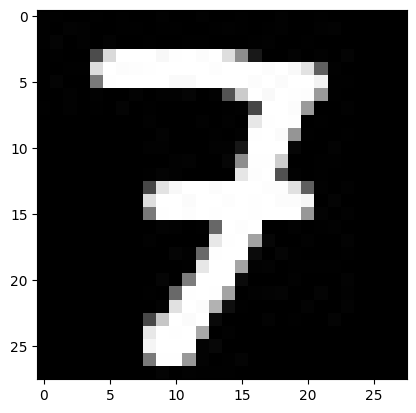

1/1 [==============================] - 0s 25ms/step


(7, 0.99955255)

In [53]:
predict_number('/content/example_img2.jpg')

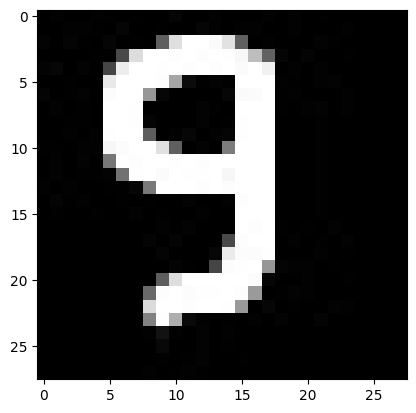

1/1 [==============================] - 0s 54ms/step


(4, 0.99714005)

In [54]:
predict_number("/content/example_img3.jpg")